# Full Ensemble Plots for Omega Aragonite (Using RCP85 Ensemble)

In [3]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [4]:
%reload_ext autoreload
%autoreload 2
from chazbpei2020.preprocessing import *

In [6]:
# Get path to file
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/OMEGA_ARAG/RCP85'
filename = 'omega_arag_irr_0.1Wm2_1x1_ens*_1950_2100.nc'
path = rootdir+experiment+'/'+filename

ds_ensemble = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')

In [5]:
ds_ensemble

<xarray.Dataset>
Dimensions:         (TIME: 1812, XT_OCEAN: 360, YT_OCEAN: 180, bnds: 2, ensemble: 1)
Coordinates:
  * TIME            (TIME) object 1950-01-16 12:00:00 ... 2100-12-16 12:00:00
  * XT_OCEAN        (XT_OCEAN) float64 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * YT_OCEAN        (YT_OCEAN) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Dimensions without coordinates: bnds, ensemble
Data variables:
    YT_OCEAN_bnds   (ensemble, YT_OCEAN, bnds) float64 dask.array<chunksize=(1, 180, 2), meta=np.ndarray>
    XT_OCEAN_bnds   (ensemble, XT_OCEAN, bnds) float64 dask.array<chunksize=(1, 360, 2), meta=np.ndarray>
    OMEGA_ARAG_IRR  (ensemble, TIME, YT_OCEAN, XT_OCEAN) float32 dask.array<chunksize=(1, 1812, 180, 360), meta=np.ndarray>
Attributes:
    history:                   Tue Aug 20 05:51:29 2019: ncrcat /archive/kbr/...
    Conventions:               CF-1.0
    code_version:              $Name: bronx-10_performance_z1l $
    NCO:                       "4.5.4"
    nco_openmp_thread_number:  1

In [7]:
# distinguish ensemble member 0
ds_member0 = ds_ensemble.sel(ensemble=0).groupby('TIME.year')

/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/aos/chazb/miniconda3/envs/chazbpei2020/lib/p

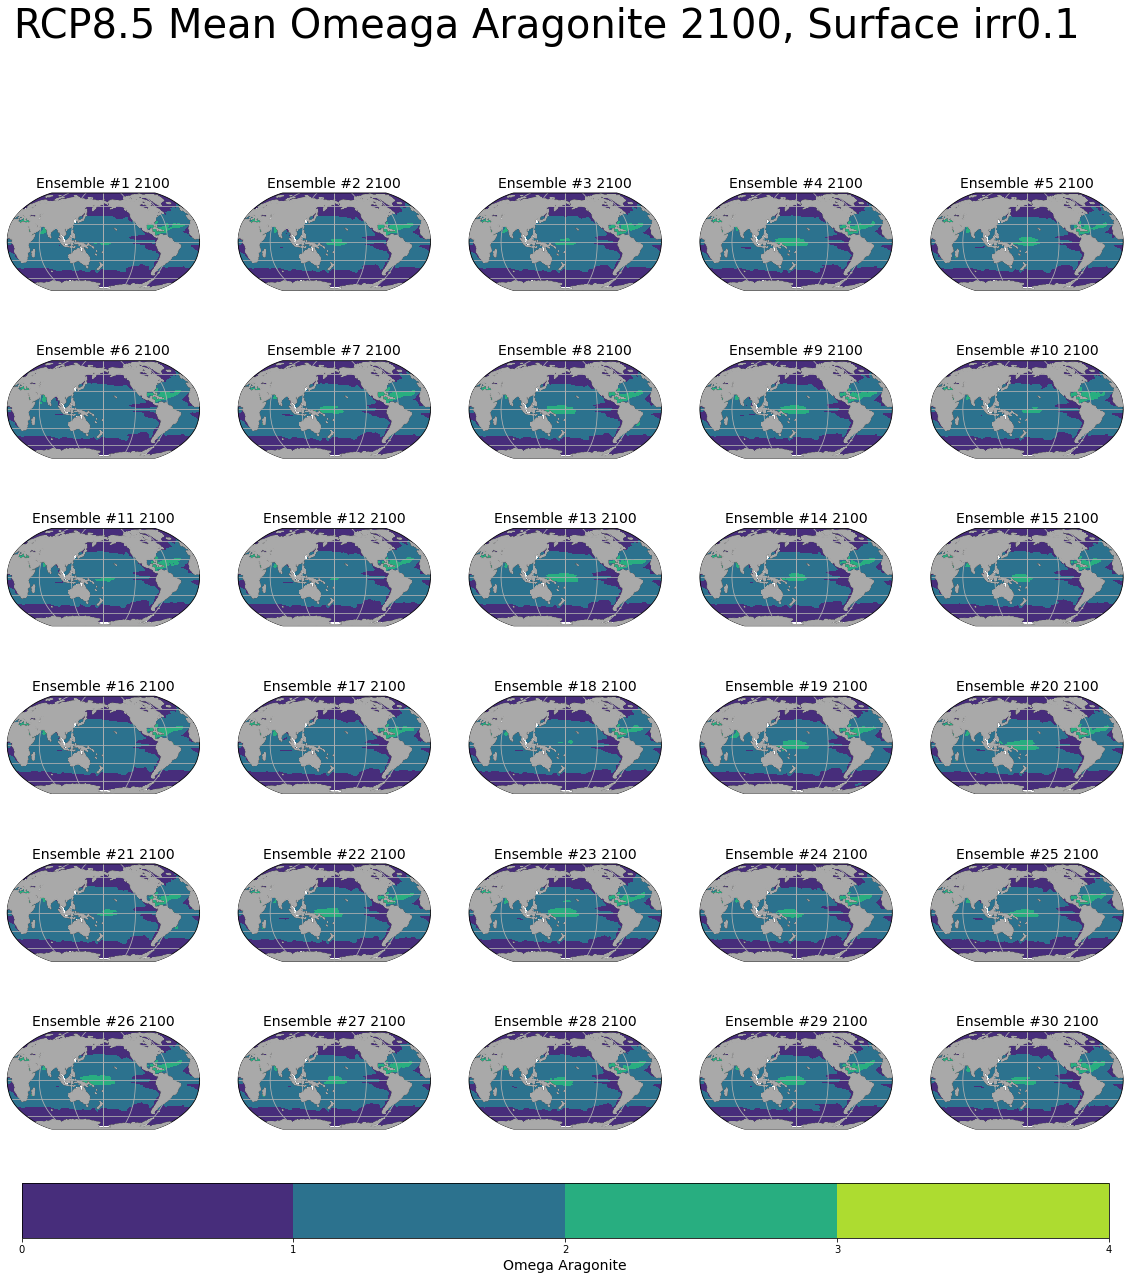

In [9]:
# Specify map projection
crs = ccrs.Robinson(central_longitude=180)

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=6,ncols=5, subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Mean Omeaga Aragonite 2100, Surface irr0.1',fontsize=40)
ensNum = 0
# Populate axes with maps for each ensemble
for row in range(6):
    for col in range(5):
        ds_ens = ds_ensemble.sel(ensemble=ensNum).groupby('TIME.year').mean(dim='TIME')
        contour_oa_irr(ds_ens,2100,axs[row,col],'Ensemble #'+str(ensNum+1))
        ensNum += 1